# Feature Engineering

Reminder of Objectives:
- See what questions we have about dating that the data can help us answer
- Determine which factors best help predict whether a match occurs with a partner
- build a predictive model that takes user inputs before interaction and predicts whether a match will occur (done with different features than objective #1)

Time for objective number 2... 

In [17]:
#importing initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', 500)

In [18]:
data = pd.read_csv('cleaned_speed_dating.csv')
data.head()

,Unnamed: 0,iid,id,gender,idg,wave,partner,pid,match,int_corr,samerace,age_partmer,race_partner,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,race,imprace,imprelig,goal,date_frequency,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,purpose
0,0,1,1.0,0,1,1,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.000000,2.0,4.0,non-romantic
1,1,1,1.0,0,1,1,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.000000,1.0,4.0,non-romantic
2,2,1,1.0,0,1,1,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,5.151008,1.0,4.0,non-romantic
3,3,1,1.0,0,1,1,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.000000,2.0,4.0,non-romantic
4,4,1,1.0,0,1,1,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,lawyer,5.296573,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.000000,2.0,4.0,non-romantic


In [19]:
data = data.drop(columns=['career', 'career_c'])

# New Feature Creation

In [20]:
#creating 3 subsets of the general interests columns
data['competitive_score'] = data['sports'] + data['tvsports'] + data['gaming']
data['arts_score'] = data['museums'] + data['art'] + data['reading'] + data['theater'] + data['concerts'] + data['music']
data['fitness_score'] = data['exercise'] + data['hiking'] + data['yoga']


        competitive_score  arts_score  fitness_score
gender                                              
0               12.781067   45.405108      17.289325
1               16.804546   40.327645      15.142481


/var/folders/q5/rk21gzmd3yndf_3sb7wt4bjm0000gn/T/ipykernel_74416/3184297845.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby('gender')['competitive_score', 'arts_score', 'fitness_score'].mean())
/var/folders/q5/rk21gzmd3yndf_3sb7wt4bjm0000gn/T/ipykernel_74416/3184297845.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('gender')['competitive_score', 'arts_score', 'fitness_score'].mean().plot(kind='bar')


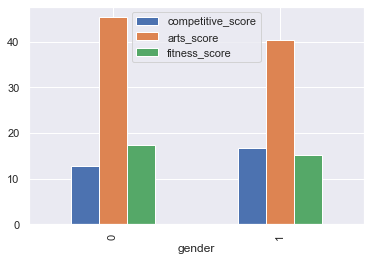

In [21]:
#just out of curiosity, seeing how these scores change by gender
print(data.groupby('gender')['competitive_score', 'arts_score', 'fitness_score'].mean())
data.groupby('gender')['competitive_score', 'arts_score', 'fitness_score'].mean().plot(kind='bar')
plt.show()

In [22]:
data = data.drop(columns=['sports', 'tvsports', 'exercise',
       'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading',
       'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'])

In [23]:
data['overall_score_by_partner'] = data['attr_o'] + data['sinc_o'] +  data['intel_o'] +  data['fun_o'] +  data['amb_o'] + data['shar_o']
data['overall_score_of_partner'] = data['attr'] + data['sinc'] +  data['intel'] +  data['fun'] +  data['amb'] + data['shar']

In [24]:
data.head()

,Unnamed: 0,iid,id,gender,idg,wave,partner,pid,match,int_corr,samerace,age_partmer,race_partner,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,race,imprace,imprelig,goal,date_frequency,go_out,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,purpose,competitive_score,arts_score,fitness_score,overall_score_by_partner,overall_score_of_partner
0,0,1,1.0,0,1,1,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.000000,2.0,4.0,non-romantic,12.0,28.0,14.0,44.0,40.0
1,1,1,1.0,0,1,1,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.000000,1.0,4.0,non-romantic,12.0,28.0,14.0,44.0,41.0
2,2,1,1.0,0,1,1,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,4.0,2.0,4.0,2.0,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,5.151008,1.0,4.0,non-romantic,12.0,28.0,14.0,60.0,42.0
3,3,1,1.0,0,1,1,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.000000,2.0,4.0,non-romantic,12.0,28.0,14.0,49.0,42.0
4,4,1,1.0,0,1,1,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,4.0,2.0,4.0,2.0,1,7,15.0,20.0,20.0,15.0,15.0,15.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.000000,2.0,4.0,non-romantic,12.0,28.0,14.0,46.0,37.0


# Feature Consolidation

In [25]:
df = data.copy()
# dropping unecessary columns
data = data.drop(columns=['Unnamed: 0', 'iid', 'id', 'idg', 'wave', 'partner', 'pid'])
#dropping columns that give too much indication of a match, besides dec, dec_o which we will use as the outcome varaible for some of the models
data = data.drop(columns=['prob', 'like', 'like_o', 'met', 'match_es', 'prob_o'])

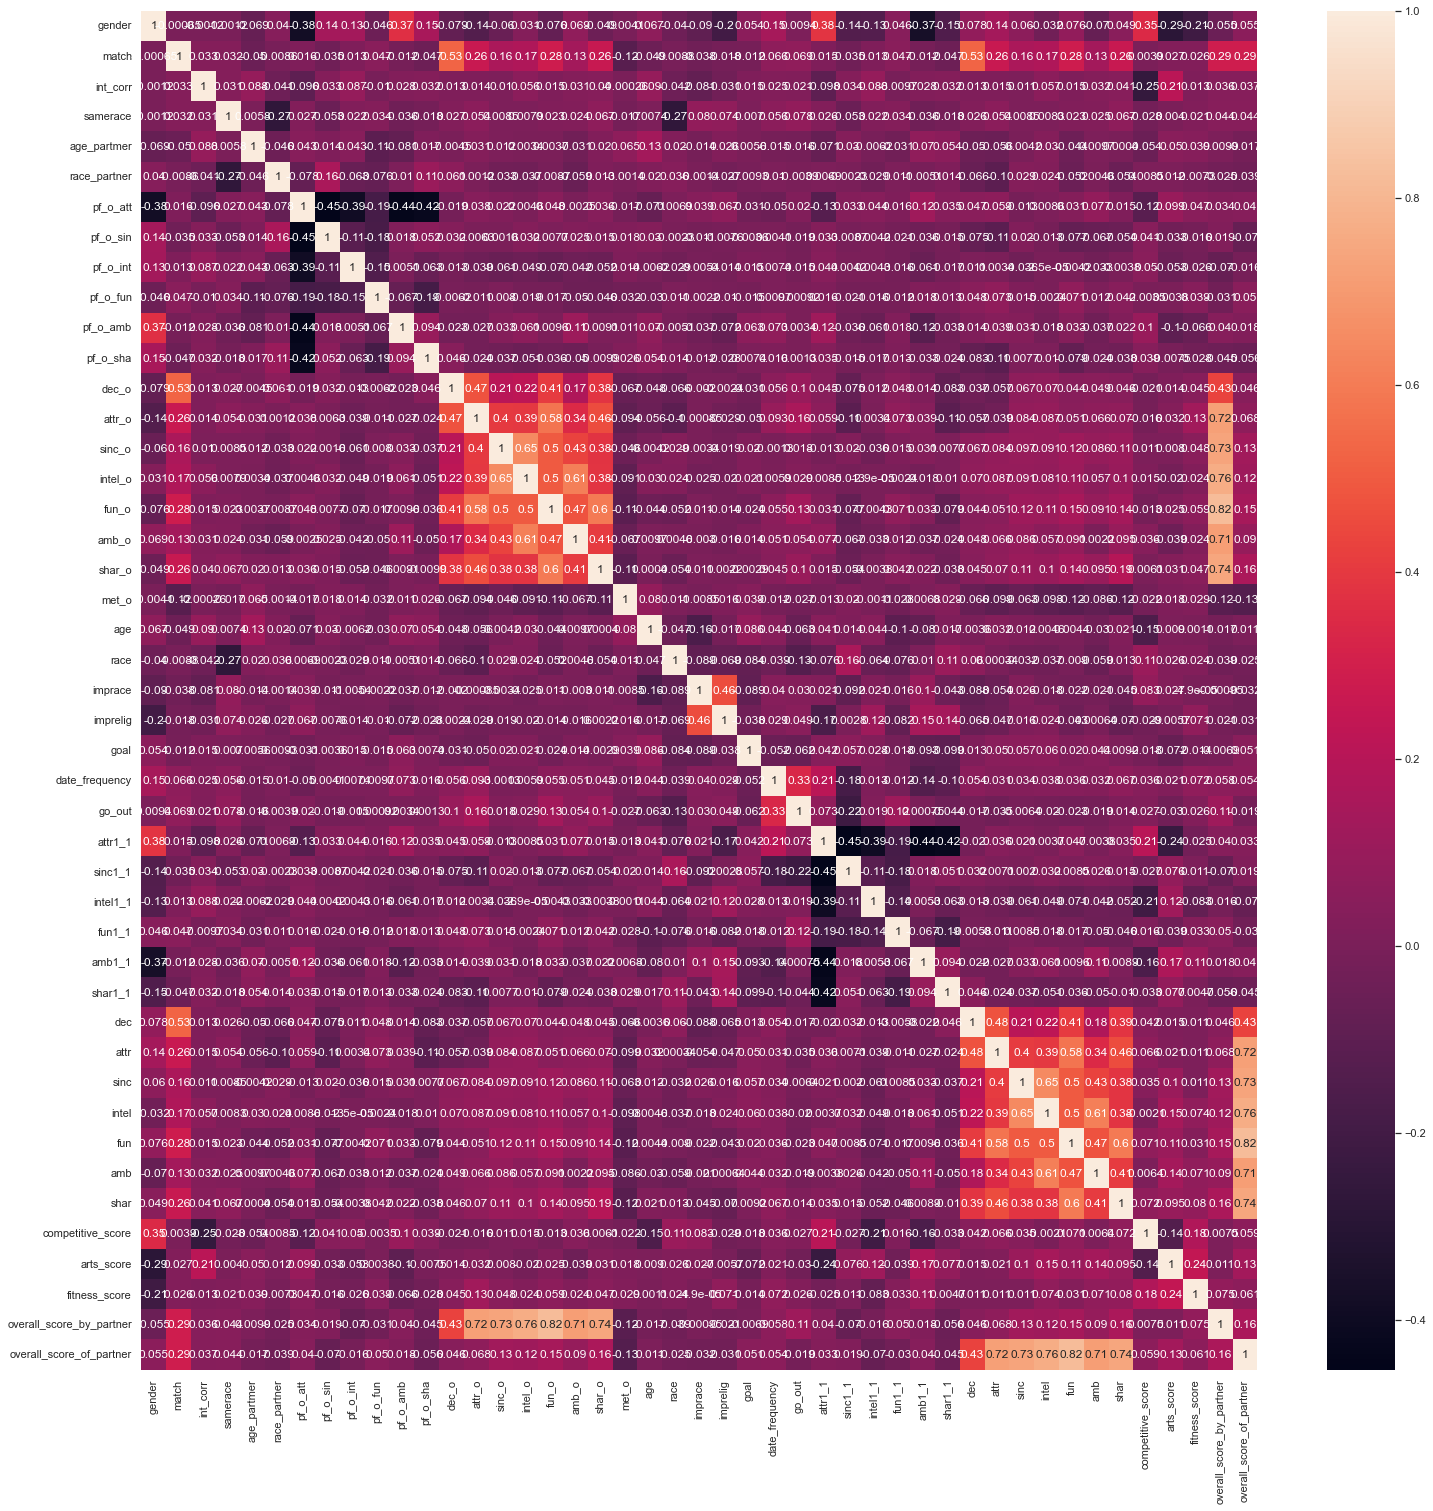

In [26]:
fig = plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Numeric Transformations

In [27]:
data.skew()

/var/folders/q5/rk21gzmd3yndf_3sb7wt4bjm0000gn/T/ipykernel_74416/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


gender                     -0.002935
match                       1.806367
int_corr                   -0.250933
samerace                    0.450037
age_partmer                 1.017152
race_partner                1.096060
pf_o_att                    1.927972
pf_o_sin                    0.321393
pf_o_int                    0.432419
pf_o_fun                    0.574336
pf_o_amb                    0.594387
pf_o_sha                    0.149996
dec_o                       0.338136
attr_o                     -0.320310
sinc_o                     -0.653753
intel_o                    -0.561755
fun_o                      -0.436851
amb_o                      -0.402403
shar_o                     -0.206312
met_o                      -0.504941
age                         1.012344
race                        1.094476
imprace                     0.749577
imprelig                    0.753634
goal                        1.490246
date_frequency              0.376326
go_out                     -1.271492
a

Categorical Columns to one hot encode:
    - race_partner
    - race
    - goal
    - purpose

Columns to log transform:
    - imprace
    - imprelig
    - pf_o_att
    - attr1_1
    
    
Skewed Columns:
    - date_frequency
    - go_out

In [28]:
data['goal'] = data['goal'].map({1: 1, 2: 2, 5: 3, 6: 4, 3: 5, 4: 6})

In [29]:
data = pd.get_dummies(data=data, columns=['race_partner', 'race', 'purpose'])

In [30]:
#standardizing all variables
#because virtually all feature are discrete and have a maximum and minimum value, outlier testing is not needed.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))
data_scaled.columns = data.columns
data_scaled.head()

,gender,match,int_corr,samerace,age_partmer,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,met_o,age,imprace,imprelig,goal,date_frequency,go_out,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,competitive_score,arts_score,fitness_score,overall_score_by_partner,overall_score_of_partner,race_partner_1.0,race_partner_2.0,race_partner_2.7900118553645523,race_partner_3.0,race_partner_4.0,race_partner_6.0,race_1.0,race_2.0,race_2.7906185261911807,race_3.0,race_4.0,race_6.0,purpose_non-romantic,purpose_romantic
0,0.0,0.0,0.530488,0.0,0.243243,0.35,0.333333,0.40,0.40,0.000000,0.166667,0.0,0.571429,0.8,0.8,0.727273,0.8,0.6,0.166667,0.081081,0.2,0.333333,0.2,0.0,1.0,0.15,0.333333,0.4,0.3,0.283019,0.5,1.0,0.6,0.9,0.7,0.7,0.6,0.5,0.3125,0.372549,0.407407,0.721311,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.774390,0.0,0.108108,0.60,0.000000,0.00,0.80,0.000000,0.000000,0.0,0.666667,0.8,1.0,0.636364,0.7,0.5,0.166667,0.081081,0.2,0.333333,0.2,0.0,1.0,0.15,0.333333,0.4,0.3,0.283019,0.5,1.0,0.7,0.8,0.7,0.8,0.5,0.6,0.3125,0.372549,0.407407,0.721311,0.683333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.542683,1.0,0.108108,0.19,0.300000,0.38,0.36,0.264151,0.400000,1.0,0.952381,1.0,1.0,0.909091,1.0,1.0,0.000000,0.081081,0.2,0.333333,0.2,0.0,1.0,0.15,0.333333,0.4,0.3,0.283019,0.5,1.0,0.5,0.8,0.9,0.8,0.5,0.7,0.3125,0.372549,0.407407,0.983607,0.700000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.817073,0.0,0.135135,0.30,0.083333,0.30,0.80,0.094340,0.166667,1.0,0.666667,0.8,0.9,0.727273,0.9,0.8,0.166667,0.081081,0.2,0.333333,0.2,0.0,1.0,0.15,0.333333,0.4,0.3,0.283019,0.5,1.0,0.7,0.6,0.8,0.7,0.6,0.8,0.3125,0.372549,0.407407,0.803279,0.700000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.573171,0.0,0.162162,0.30,0.166667,0.40,0.20,0.188679,0.666667,1.0,0.761905,0.7,0.9,0.545455,0.9,0.7,0.166667,0.081081,0.2,0.333333,0.2,0.0,1.0,0.15,0.333333,0.4,0.3,0.283019,0.5,1.0,0.5,0.6,0.7,0.7,0.6,0.6,0.3125,0.372549,0.407407,0.754098,0.616667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Determining feature importance from regression coefficients and tree-based models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# seeing what's most important overall

def coefficient_importance(x_columns, y_columns):
    X = x_columns
    y = y_columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    #obtaining feature importances from coefficients
    model = LogisticRegression(max_iter = 500)
    model.fit(X_train, y_train)
    importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
    })
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(12, 12))
    sns.barplot(data=importances, x='Importance', y='Attribute', palette='rocket')
    plt.title('Coefficient Importances')
    plt.show()

from xgboost import XGBClassifier
def xgboost_importance(x_columns, y_columns):
    X = x_columns
    y = y_columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = XGBClassifier()
    model.fit(X_train, y_train)
    #ensuring that boost uses "gain" criterion to measure importance (best for measuring importance in binary prediction)
    importances = model.get_booster().get_score(importance_type='gain')
    feature_names = list(importances.keys())
    feature_importances = list(importances.values())
    dataframe = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
    fig = plt.figure(figsize=(12, 12))
    sns.barplot(x=dataframe.Importance, y=dataframe.Feature, palette='crest')
    plt.title('XGBoost Importances')
    plt.show()

from sklearn.tree import DecisionTreeClassifier
def decision_tree_importance(x_columns, y_columns):
    X = x_columns
    y = y_columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = DecisionTreeClassifier(criterion='gini')
    model.fit(X_train, y_train)
    feature_importances = model.feature_importances_
    sorted_indices = feature_importances.argsort()[::-1]
    sorted_feature_names = X.columns[sorted_indices]
    sorted_importances = feature_importances[sorted_indices]
    fig = plt.figure(figsize=(12, 12))
    sns.barplot(sorted_importances, sorted_feature_names, palette='mako')
    plt.title('Decision Tree Importances')
    plt.show()
    



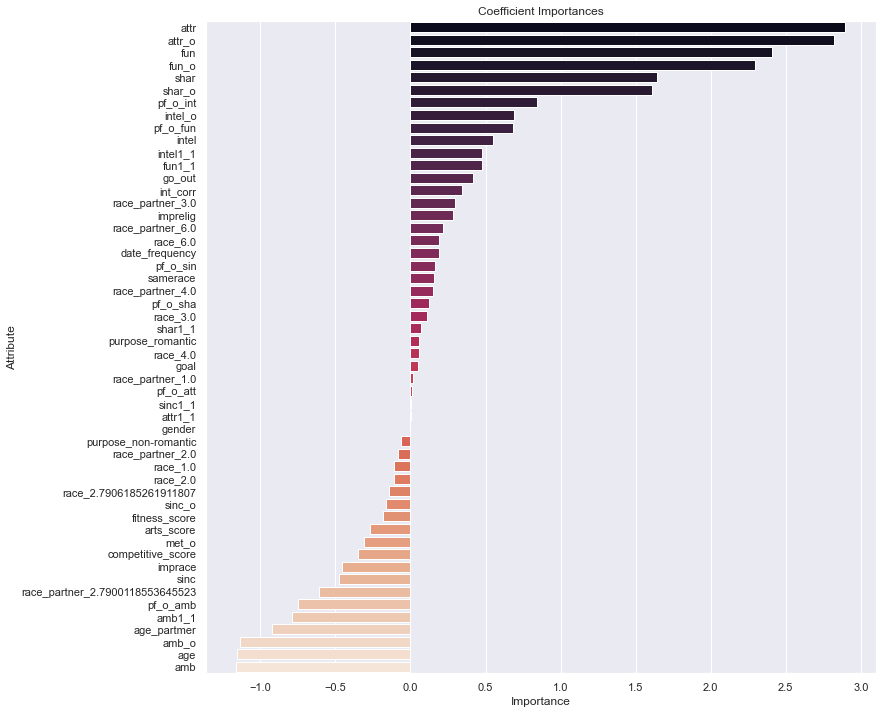

In [32]:
coefficient_importance(data_scaled.drop(columns=['match', 'dec', 'dec_o', 'overall_score_of_partner', 'overall_score_by_partner']), data_scaled['match'])

It's not a surprise that perceived attractiveness is the most important indicator of a match. It is interesting however that the model indicates that ambition, as well as how important one perceives ambition to be, has an inverse effect on one's ability to get a match. Maybe people who came off as ambitious also came off as overbearing? 

Overall, people's preferences for different attributes mattered  less to the model than what they actually saw in them. 

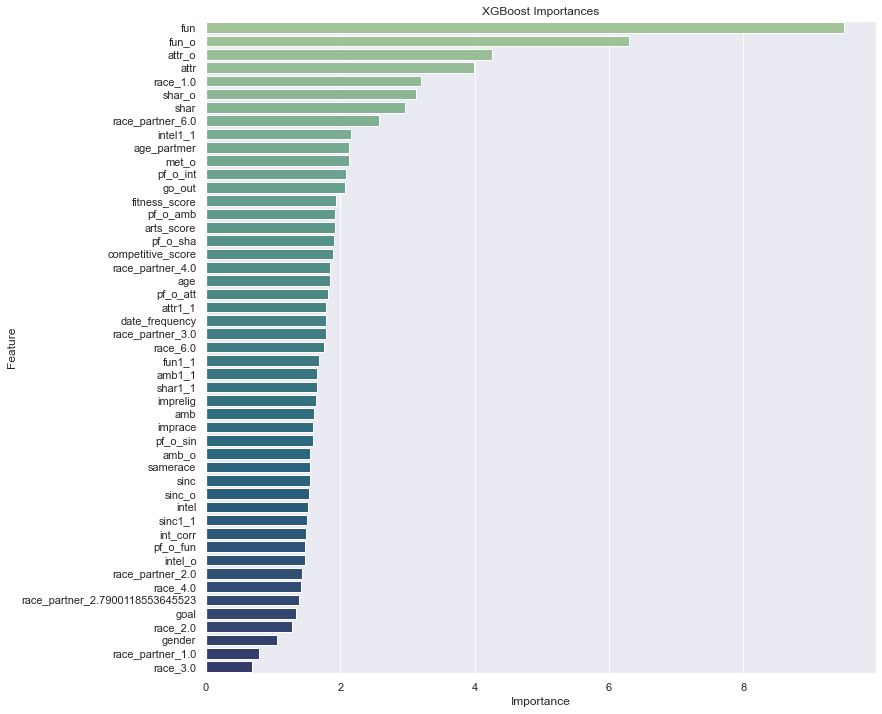

In [33]:
xgboost_importance(data_scaled.drop(columns=['match', 'dec', 'dec_o', 'overall_score_of_partner', 'overall_score_by_partner']), data_scaled['match'])

/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


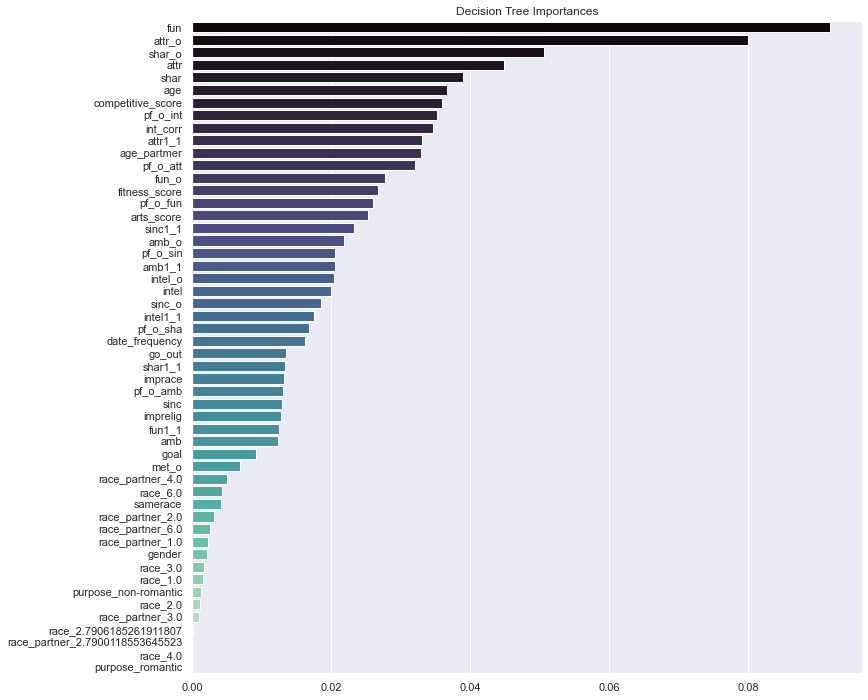

In [34]:
decision_tree_importance(data_scaled.drop(columns=['match', 'dec', 'dec_o', 'overall_score_of_partner', 'overall_score_by_partner']), data_scaled['match'])


Our created features didn't seem to muster up to a large amount of importance. Interestingly, neither did intelligence or sincerity. Not only were they considered less important in the tree-based feature importances, but sincerity (along with ambition) actually made someone less likely to get a match according to the regression model. Perhaps this is indicating that you should spend the first four minutes meeting someone on a date being more fun and light-hearted than sincere and intellectual. 

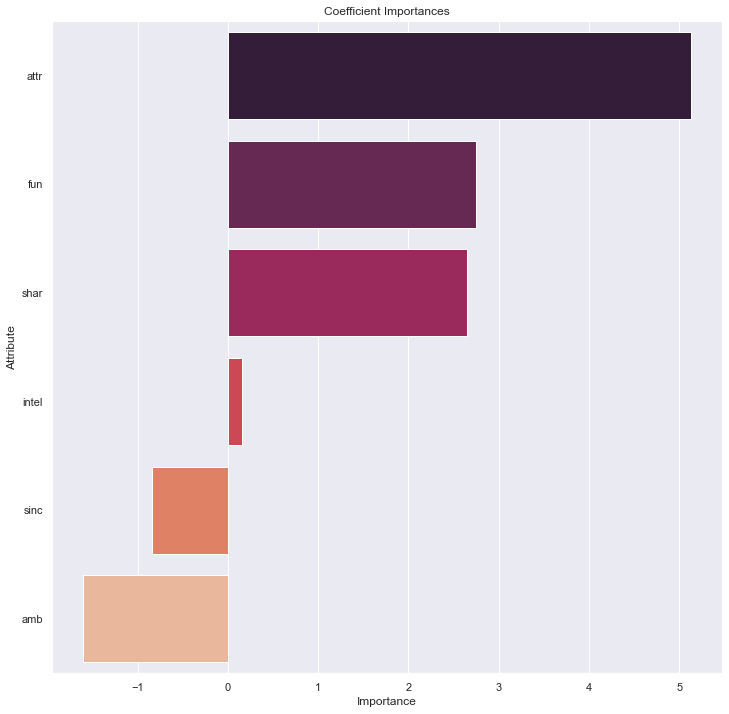

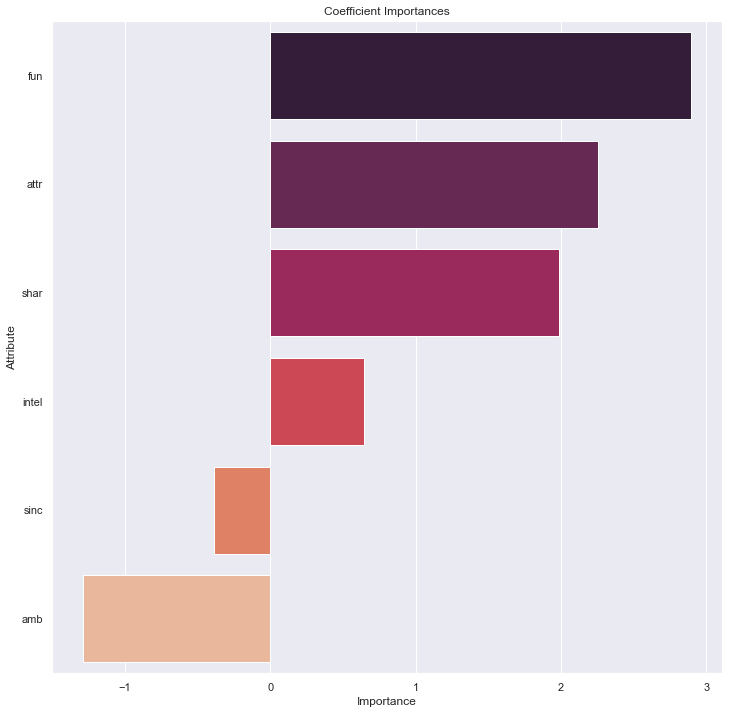

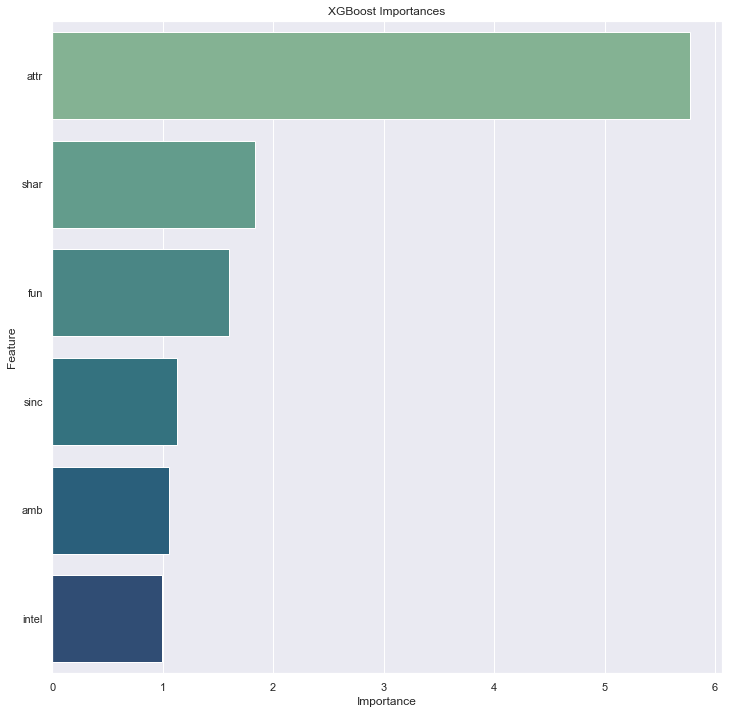

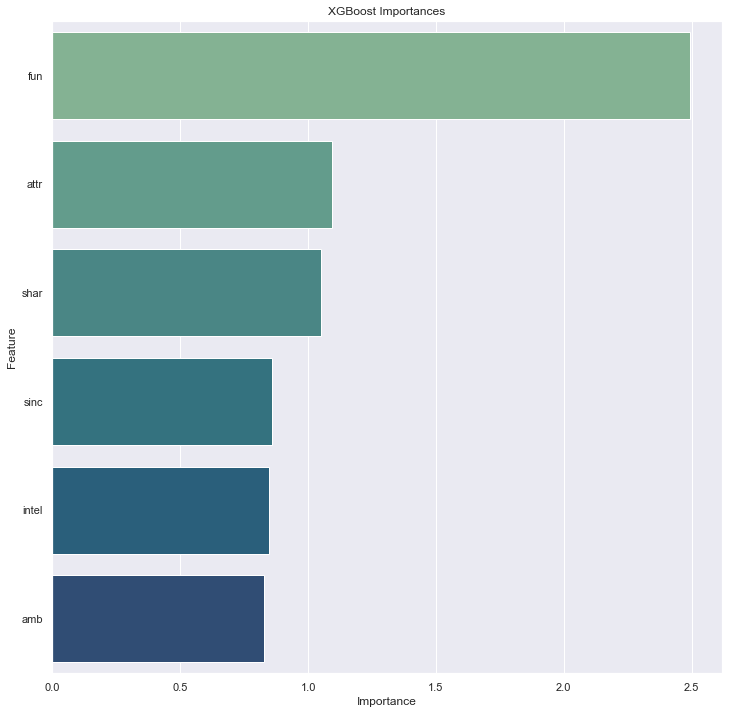

/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


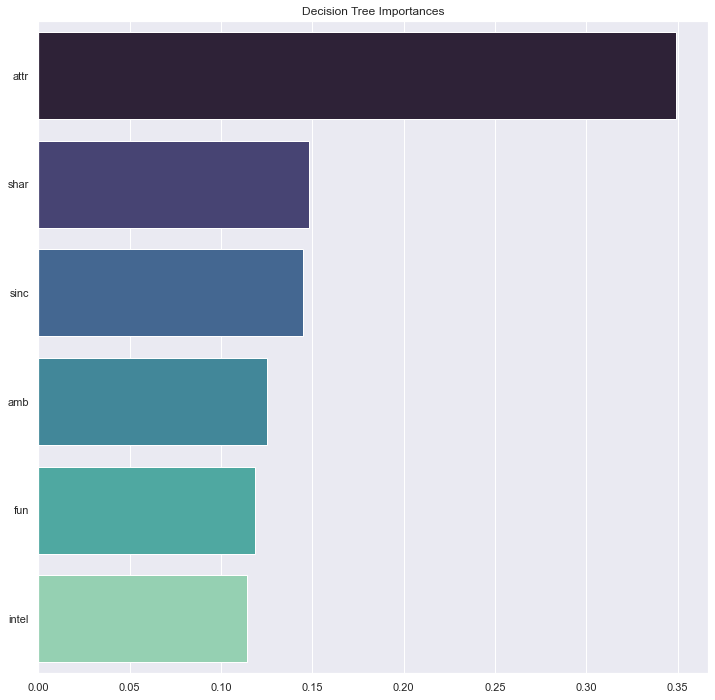

/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


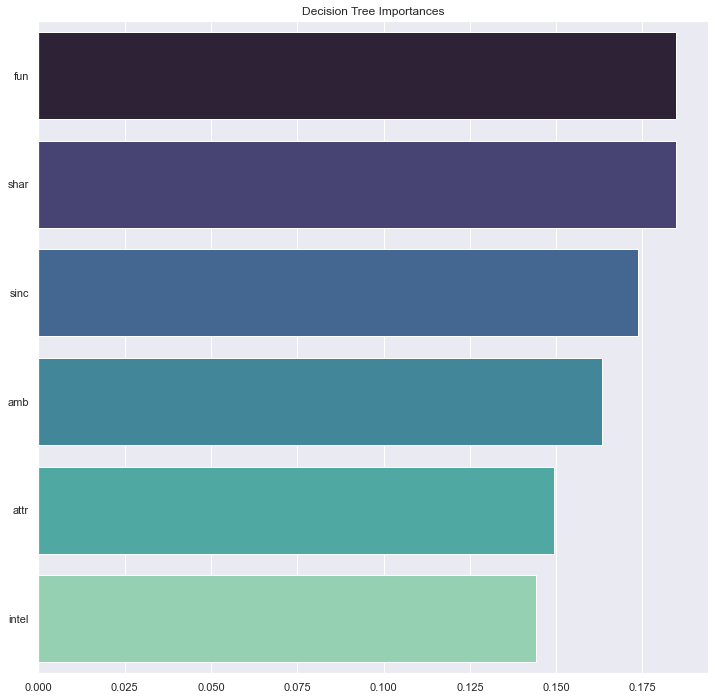

In [35]:
#seeing what's most important regarding ratings; both for decisions and matches
coefficient_importance(data_scaled[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']], data.dec)
coefficient_importance(data_scaled[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']], data.match)

xgboost_importance(data_scaled[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']], data.dec)
xgboost_importance(data_scaled[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']], data.match)

decision_tree_importance(data_scaled[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']], data.dec)
decision_tree_importance(data_scaled[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']], data.match)


There's actually a lot of change in the importance of features when it comes to the individual person's decision and whether a match occurred. In terms of generating a match, the partner being fun is most important. In terms of an individual decision, attractiveness is more important

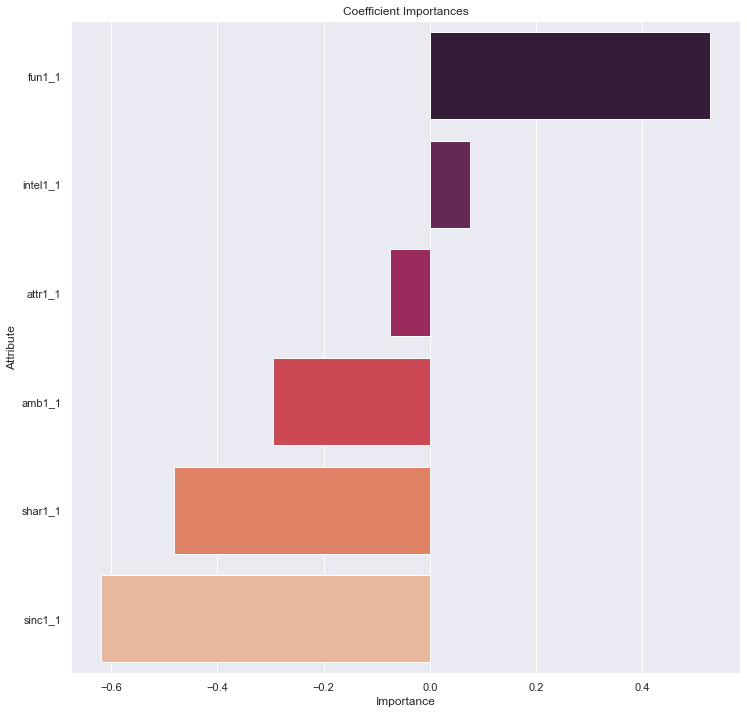

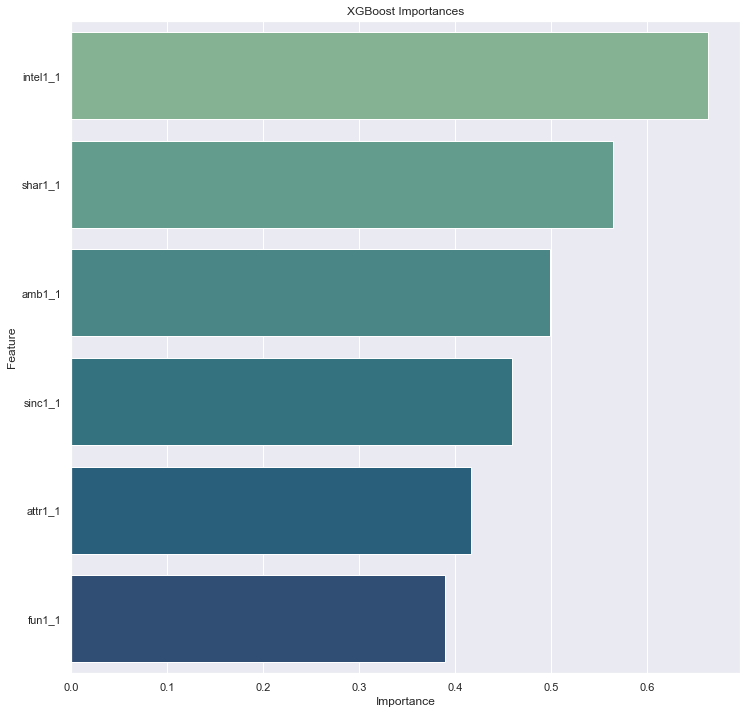

/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


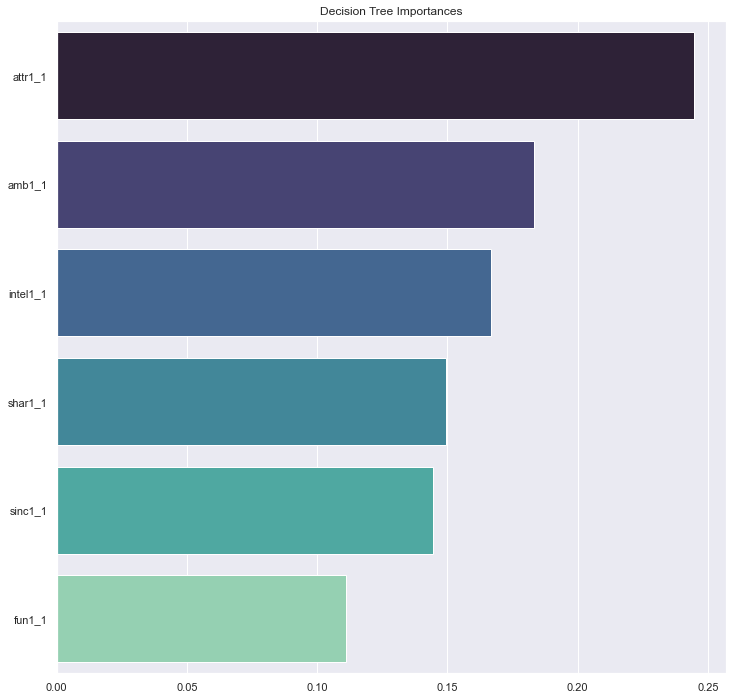

In [36]:
#seeing what's most important regarding preferences for partner's decision
coefficient_importance(data_scaled[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']], data.match)
xgboost_importance(data_scaled[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']], data.match)
decision_tree_importance(data_scaled[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']], data.match)



In [37]:
data_scaled.groupby('dec_o')['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'].mean()


/var/folders/q5/rk21gzmd3yndf_3sb7wt4bjm0000gn/T/ipykernel_74416/387232066.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_scaled.groupby('dec_o')['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'].mean()


,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
dec_o,,,,,,
0.0,0.234687,0.296386,0.409751,0.341672,0.182483,0.390629
1.0,0.247019,0.276984,0.413229,0.354565,0.185769,0.353480


In [38]:
#finally, what seems to be most important in overall ratings to decisions
import statsmodels.api as sm
X_ols = data[['attr','sinc','intel','fun', 'amb', 'shar']]
y_ols = data['dec']
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dec   R-squared (uncentered):                   0.564
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              1465.
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:35:57   Log-Likelihood:                         -3866.1
No. Observations:                6816   AIC:                                      7744.
Df Residuals:                    6810   BIC:                                      7785.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.0793      0.003     23.808      0.000       0.073       0.086
sinc          -0.0272      0.004     -6.824      0.000      -0.035      -0.019
intel         -0.0160      0.005     -3.327      0.001      -0.025      -0.007
fun            0.0396      0.004     10.077      0.000       0.032       0.047
amb           -0.0341      0.004     -8.823      0.000      -0.042      -0.026
shar           0.0427      0.003     13.149      0.000       0.036       0.049
==============================================================================
Omnibus:                    33431.494   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.086
Skew:                           0.172   Prob(JB):                    4.27e-114
Kurtosis:                       1.688   Cond. No.                         18.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X_ols = data_scaled[['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']]
y_ols = data['dec']
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dec   R-squared (uncentered):                   0.424
Model:                            OLS   Adj. R-squared (uncentered):              0.423
Method:                 Least Squares   F-statistic:                              835.2
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:35:57   Log-Likelihood:                         -4811.9
No. Observations:                6816   AIC:                                      9636.
Df Residuals:                    6810   BIC:                                      9677.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pf_o_att       0.4938      0.036     13.577      0.000       0.422       0.565
pf_o_sin       0.0475      0.041      1.166      0.244      -0.032       0.127
pf_o_int       0.2663      0.033      8.084      0.000       0.202       0.331
pf_o_fun       0.3457      0.037      9.225      0.000       0.272       0.419
pf_o_amb       0.3459      0.051      6.847      0.000       0.247       0.445
pf_o_sha      -0.0228      0.025     -0.895      0.371      -0.073       0.027
==============================================================================
Omnibus:                    26315.040   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1081.075
Skew:                           0.327   Prob(JB):                    1.77e-235
Kurtosis:                       1.161   Cond. No.                         7.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X_ols = data_scaled[['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']]
y_ols = data_scaled['dec_o']
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  dec_o   R-squared (uncentered):                   0.419
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              817.8
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:35:57   Log-Likelihood:                         -4838.6
No. Observations:                6816   AIC:                                      9689.
Df Residuals:                    6810   BIC:                                      9730.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pf_o_att       0.3619      0.037      9.913      0.000       0.290       0.433
pf_o_sin       0.3378      0.041      8.255      0.000       0.258       0.418
pf_o_int       0.1675      0.033      5.064      0.000       0.103       0.232
pf_o_fun       0.2061      0.038      5.478      0.000       0.132       0.280
pf_o_amb       0.0597      0.051      1.176      0.240      -0.040       0.159
pf_o_sha       0.2158      0.026      8.429      0.000       0.166       0.266
==============================================================================
Omnibus:                    25743.516   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1120.319
Skew:                           0.337   Prob(JB):                    5.32e-244
Kurtosis:                       1.132   Cond. No.                         7.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# EDA from feature importance insights

One of the most important insights from the feature importance analysis is that there seems to be a hierarchy of importance for the 6 different characteristics, both in terms of overall importance and benefit to getting a match. Fun and attractiveness compete for the top spot, followed by shared interests, sincerity, intelligence, and ambition (in that order). Let's visualize what on average people think they prefer in terms of making a decision vs what they actually tend to go for.


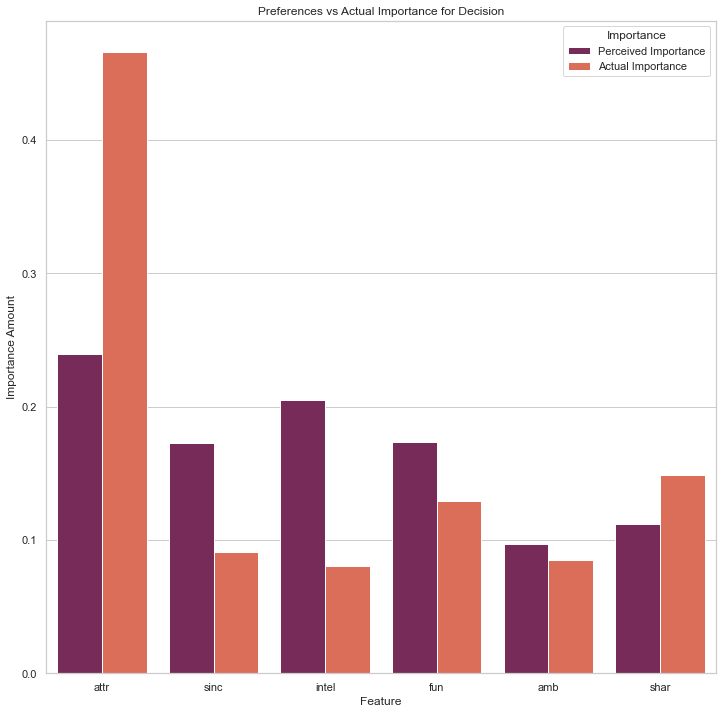

In [41]:
#get mean values for preference columns (what people on average think they want)
preferences = pd.DataFrame(data[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean(), columns=['Weight'])
preferences = preferences.reset_index()
preferences.rename(columns={'index': 'Feature'}, inplace=True)
preferences['Feature'] = preferences['Feature'].map({'attr1_1': 'attr', 'sinc1_1': 'sinc', 'intel1_1': 'intel', 'fun1_1': 'fun', 'amb1_1': 'amb', 'shar1_1': 'shar'})

#get feature importances from XGBoost feature importances
X = data[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
y = data['dec']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
importances = model.get_booster().get_score(importance_type='gain')
feature_names = list(importances.keys())
feature_importances = list(importances.values())
dataframe = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

#combine the dataframes and set weights and importances to be proportional
merged_df = pd.merge(preferences, dataframe, on='Feature')
merged_df['Perceived Importance'] = merged_df['Weight'] / merged_df['Weight'].sum()
merged_df['Actual Importance'] = merged_df['Importance'] / merged_df['Importance'].sum()

melted_df = pd.melt(frame=merged_df, id_vars = 'Feature', value_vars = ['Perceived Importance', 'Actual Importance'], var_name='Importance')

#plot table
fig = plt.figure(figsize=(12, 12))
sns.set_theme(style="whitegrid")
sns.barplot(data=melted_df, x='Feature', y='value', hue='Importance', palette='rocket')
plt.ylabel('Importance Amount')
plt.title('Preferences vs Actual Importance for Decision')
plt.show()


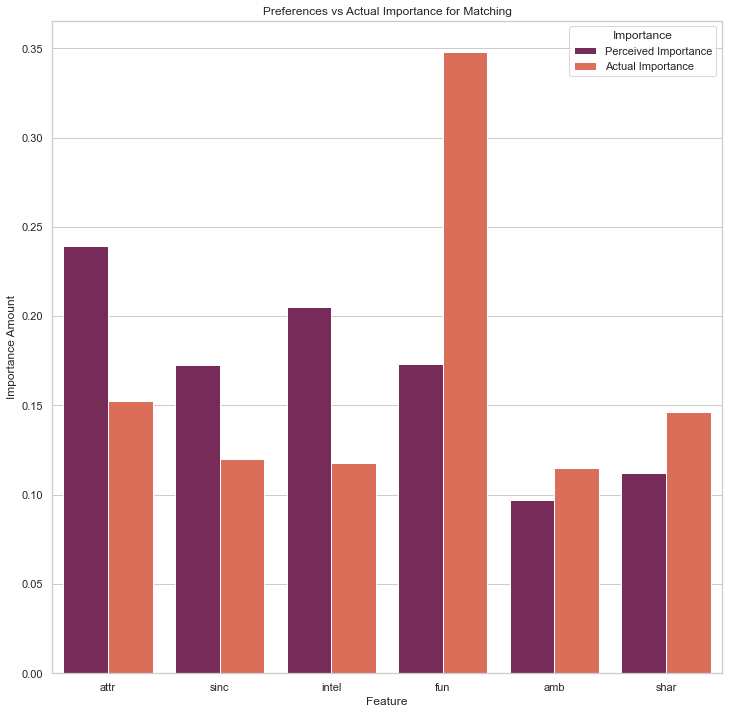

In [42]:
#get mean values for preference columns (what people on average think they want)
preferences = pd.DataFrame(data[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean(), columns=['Weight'])
preferences = preferences.reset_index()
preferences.rename(columns={'index': 'Feature'}, inplace=True)
preferences['Feature'] = preferences['Feature'].map({'attr1_1': 'attr', 'sinc1_1': 'sinc', 'intel1_1': 'intel', 'fun1_1': 'fun', 'amb1_1': 'amb', 'shar1_1': 'shar'})

#get feature importances from XGBoost feature importances
X = data[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
y = data['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
importances = model.get_booster().get_score(importance_type='gain')
feature_names = list(importances.keys())
feature_importances = list(importances.values())
dataframe = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

#combine the dataframes and set weights and importances to be proportional
merged_df = pd.merge(preferences, dataframe, on='Feature')
merged_df['Perceived Importance'] = merged_df['Weight'] / merged_df['Weight'].sum()
merged_df['Actual Importance'] = merged_df['Importance'] / merged_df['Importance'].sum()

melted_df = pd.melt(frame=merged_df, id_vars = 'Feature', value_vars = ['Perceived Importance', 'Actual Importance'], var_name='Importance')

#plot table
fig = plt.figure(figsize=(12, 12))
sns.set_theme(style="whitegrid")
sns.barplot(data=melted_df, x='Feature', y='value', hue='Importance', palette='rocket')
plt.ylabel('Importance Amount')
plt.title('Preferences vs Actual Importance for Matching')
plt.show()

Perhaps the reason someone being fun is much more important for a match than attractiveness is because how fun you think someone is depends on how good the interaction you had with them was, whereas attractiveness is more objective.

If this is the case, we should see a correlation between fun and fun_o, and we shouldn't see as large of a correlation between attr and attr_o or the other attributes.

In [43]:
from scipy.stats import pearsonr
def correlation(column1, column2):
    print(column1, '\n')
    print('Correlation: ',pearsonr(data[column1], data[column2])[0], '\n')

correlation('attr', 'attr_o')
correlation('fun', 'fun_o')
correlation('sinc', 'sinc_o')
correlation('shar', 'shar_o')
correlation('intel', 'intel_o')
correlation('amb', 'amb_o')   

    

attr 

Correlation:  -0.038992266189286875 

fun 

Correlation:  0.1497575544891367 

sinc 

Correlation:  0.09680331675798876 

shar 

Correlation:  0.19394394154722483 

intel 

Correlation:  0.08097554094920714 

amb 

Correlation:  0.0021691971638085807 



Yep, the correlation of .15 for fun and fun_o isn't a huge one, but it could be enough to explain its heightened importance for matching.

These are some pretty important tables. We can see how much they vary depending on gender.

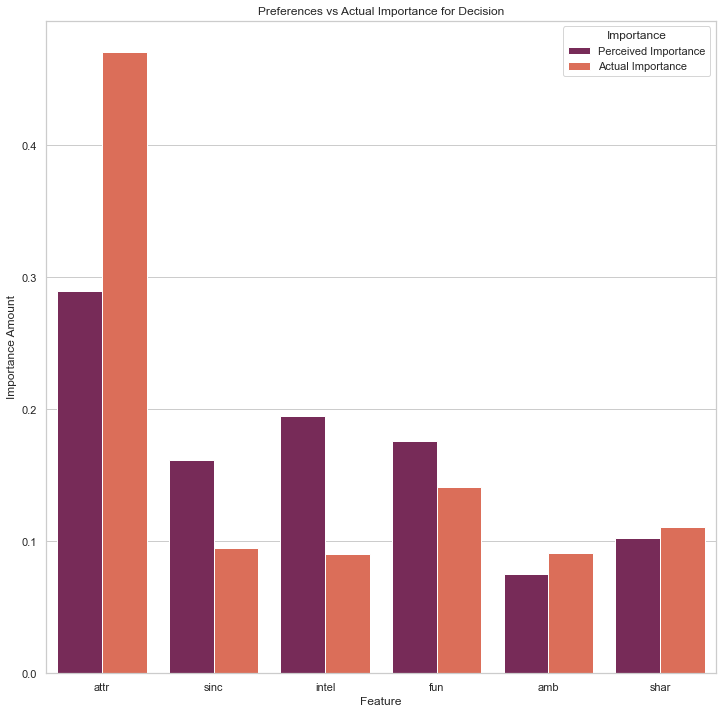

In [44]:
males = data[data.gender==1]
females = data[data.gender==0]

#get mean values for preference columns (what people on average think they want)
preferences = pd.DataFrame(males[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean(), columns=['Weight'])
preferences = preferences.reset_index()
preferences.rename(columns={'index': 'Feature'}, inplace=True)
preferences['Feature'] = preferences['Feature'].map({'attr1_1': 'attr', 'sinc1_1': 'sinc', 'intel1_1': 'intel', 'fun1_1': 'fun', 'amb1_1': 'amb', 'shar1_1': 'shar'})

#get feature importances from XGBoost feature importances
X = males[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
y = males['dec']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
importances = model.get_booster().get_score(importance_type='gain')
feature_names = list(importances.keys())
feature_importances = list(importances.values())
dataframe = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

#combine the dataframes and set weights and importances to be proportional
merged_df = pd.merge(preferences, dataframe, on='Feature')
merged_df['Perceived Importance'] = merged_df['Weight'] / merged_df['Weight'].sum()
merged_df['Actual Importance'] = merged_df['Importance'] / merged_df['Importance'].sum()

melted_df = pd.melt(frame=merged_df, id_vars = 'Feature', value_vars = ['Perceived Importance', 'Actual Importance'], var_name='Importance')

#plot table
fig = plt.figure(figsize=(12, 12))
sns.set_theme(style="whitegrid")
sns.barplot(data=melted_df, x='Feature', y='value', hue='Importance', palette='rocket')
plt.ylabel('Importance Amount')
plt.title('Preferences vs Actual Importance for Decision for Males')
plt.show()

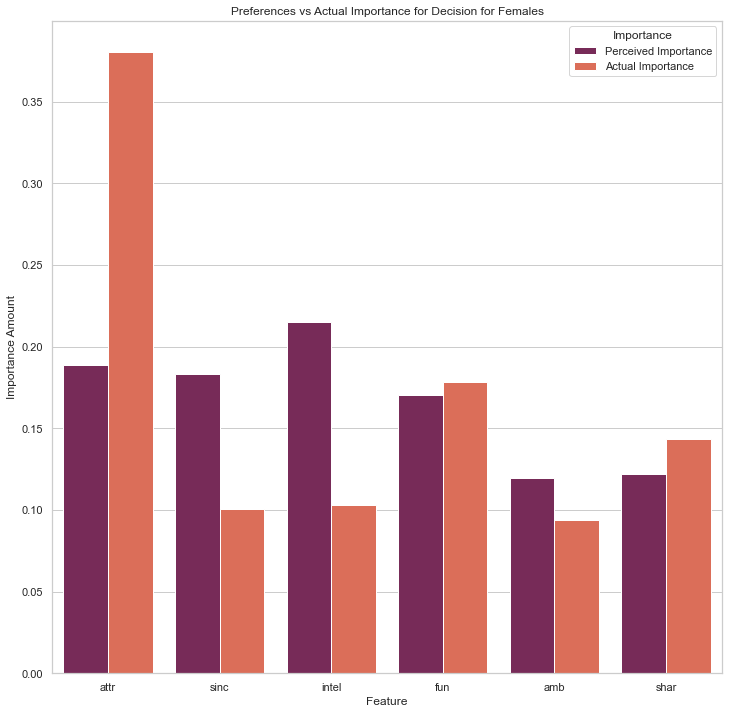

In [46]:
#get mean values for preference columns (what people on average think they want)
preferences = pd.DataFrame(females[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean(), columns=['Weight'])
preferences = preferences.reset_index()
preferences.rename(columns={'index': 'Feature'}, inplace=True)
preferences['Feature'] = preferences['Feature'].map({'attr1_1': 'attr', 'sinc1_1': 'sinc', 'intel1_1': 'intel', 'fun1_1': 'fun', 'amb1_1': 'amb', 'shar1_1': 'shar'})

#get feature importances from XGBoost feature importances
X = females[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
y = females['dec']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
importances = model.get_booster().get_score(importance_type='gain')
feature_names = list(importances.keys())
feature_importances = list(importances.values())
dataframe = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

#combine the dataframes and set weights and importances to be proportional
merged_df = pd.merge(preferences, dataframe, on='Feature')
merged_df['Perceived Importance'] = merged_df['Weight'] / merged_df['Weight'].sum()
merged_df['Actual Importance'] = merged_df['Importance'] / merged_df['Importance'].sum()

melted_df = pd.melt(frame=merged_df, id_vars = 'Feature', value_vars = ['Perceived Importance', 'Actual Importance'], var_name='Importance')

#plot table
fig = plt.figure(figsize=(12, 12))
sns.set_theme(style="whitegrid")
sns.barplot(data=melted_df, x='Feature', y='value', hue='Importance', palette='rocket')
plt.ylabel('Importance Amount')
plt.title('Preferences vs Actual Importance for Decision for Females')
plt.show()

In [45]:
data.to_csv('speed_dating_feature_importances.csv')